In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 

In [2]:
import cv2

original dimensions of image 
(4360, 5674, 3)
new dimension of our image 
(800, 1041, 3)


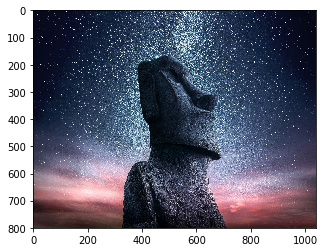

In [3]:
path='E:/Github_projects/Color_extraction/statue.jpg'
##setting path to our photo
im=cv2.imread(path)
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print('''original dimensions of image ''')
print(im.shape)
'''this way the pixel ratio will nnot get distorted '''
new_r=800
new_c=int(float(im.shape[1]/im.shape[0])*new_r)
img=cv2.resize(im,(new_c,new_r))
print('''new dimension of our image ''')
print(img.shape)
plt.imshow(img)

In [4]:
data=np.reshape(img,(-1,3))
## reshaping image
print(data.shape)
print("---------")
print(data.dtype)

(832800, 3)
---------
uint8


In [5]:
from sklearn.cluster import KMeans 
##importing k-mean clustering from sklearn 

In [6]:
km=KMeans(n_clusters=8)
km.fit(data)
## fitting our model 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
centroids=np.array(km.cluster_centers_,dtype=np.uint8)
print(centroids.shape)
print(centroids)
print('''These are the centroids opf our 8 most dominant color in our image ''')

(8, 3)
[[ 27  41  66]
 [155 153 178]
 [153  92 100]
 [219 197 213]
 [ 55  70  98]
 [ 10  16  32]
 [ 96 110 139]
 [ 83  50  51]]
These are the centroids opf our 8 most dominant color in our image 


In [8]:
for ix in range(500):
    print(km.labels_[ix],end=" ")
print()
print("For checkimg the differrent labels in our km fit model")

5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 6 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 4 5 0 0 0 5 5 5 5 5 0 5 5 0 5 5 5 5 5 0 0 5 4 5 5 5 0 0 0 5 5 5 0 0 5 0 0 5 0 0 5 5 5 0 0 0 0 0 3 5 5 5 5 5 5 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 5 0 0 0 0 6 0 0 0 0 0 4 6 0 0 0 0 0 0 5 0 0 5 0 5 0 0 0 0 0 5 0 0 0 0 4 5 0 0 4 0 0 5 3 0 0 0 0 0 0 0 4 1 0 0 0 0 0 0 0 6 4 4 0 0 0 0 0 3 4 0 0 3 0 0 6 0 0 0 0 0 0 0 0 0 0 0 4 6 0 0 0 0 4 0 0 4 4 6 0 4 0 0 4 1 1 0 6 0 0 0 0 4 4 0 4 0 0 0 0 0 0 0 0 4 0 4 0 0 4 4 5 0 0 4 0 4 3 4 0 1 4 0 4 4 6 0 0 4 0 4 4 6 1 4 0 4 4 6 6 0 0 4 1 3 0 0 0 0 0 0 1 1 6 6 5 4 5 0 4 4 4 0 4 4 6 6 0 3 4 0 4 4 4 0 0 4 0 

In [9]:
print (km.labels_.shape)
print (km.labels_.dtype)
freq = np.unique(km.labels_, return_counts=True)
print (freq)
print('''To check all different values of labels in our image and their count in number or can say their frequencies''')

(832800,)
int32
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([183799,  70271,  34596,  65079, 143168, 211563,  85690,  38634],
      dtype=int64))
To check all different values of labels in our image and their count in number or can say their frequencies


In [10]:
label_id = freq[0][freq[1].argmax()]
label_id2 = freq[0][freq[1].argmin()]

print (label_id)
print("postion of most dominant color in centroid array")
most_dom_color = centroids[label_id]

most_min_color = centroids[label_id2]
print (most_dom_color)
print('centroid of most dominant color')
print(most_min_color)
print('centroid of least dominant color')
display_stamp = np.zeros((20,20,3), dtype=np.uint8)
display_stamp[:, :, :] = most_dom_color


display_stamp2 = np.zeros((20,20,3), dtype=np.uint8)
display_stamp2[:, :, :] = most_min_color

5
postion of most dominant color in centroid array
[10 16 32]
centroid of most dominant color
[153  92 100]
centroid of least dominant color


most dominant color in our pic


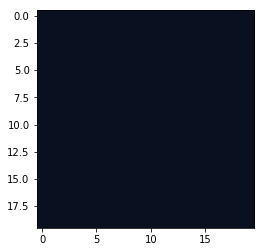

In [11]:

plt.imshow(display_stamp)
print("most dominant color in our pic" )
plt.show()

least dominant color in our pic


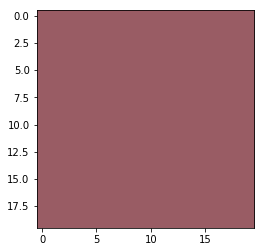

In [12]:

plt.imshow(display_stamp2)
print("least dominant color in our pic" )
plt.show()

In [13]:
print("now we will make an array which contains the frequency ratios of 8 most dominant color in our pic")
freq_counts=freq[1]
print(freq_counts)
print(freq_counts.sum())

freq_ratio=freq_counts/float(freq_counts.sum())
print(freq_ratio)
print("ratio of frequencies of label")
print(freq_ratio.shape)

now we will make an array which contains the frequency ratios of 8 most dominant color in our pic
[183799  70271  34596  65079 143168 211563  85690  38634]
832800
[0.22070005 0.0843792  0.04154179 0.07814481 0.17191162 0.25403818
 0.10289385 0.04639049]
ratio of frequencies of label
(8,)


In [14]:
info=[]
'it will run for 8 times for every 8 color'
for ix in range(freq_ratio.shape[0]):
    item=(centroids[ix],freq_ratio[ix])
    info.append(item)
print("----------------info will save record of the centroid of every color with its respective  freq_ratio-----------------")
print("                                                    **********************")
print(info) 

----------------info will save record of the centroid of every color with its respective  freq_ratio-----------------
                                                    **********************
[(array([27, 41, 66], dtype=uint8), 0.22070004803073967), (array([155, 153, 178], dtype=uint8), 0.08437920268972142), (array([153,  92, 100], dtype=uint8), 0.04154178674351585), (array([219, 197, 213], dtype=uint8), 0.07814481268011528), (array([55, 70, 98], dtype=uint8), 0.17191162343900096), (array([10, 16, 32], dtype=uint8), 0.2540381844380403), (array([ 96, 110, 139], dtype=uint8), 0.10289385206532181), (array([83, 50, 51], dtype=uint8), 0.04639048991354467)]


In [15]:
sorted_info=sorted(info,key=lambda z:z[1], reverse=True)
print("                -------now we will sort the info arrray with respect to freq_ratio that's why z:z 1 --------------")
print("                                                    **********************")
print(sorted_info)

                -------now we will sort the info arrray with respect to freq_ratio that's why z:z 1 --------------
                                                    **********************
[(array([10, 16, 32], dtype=uint8), 0.2540381844380403), (array([27, 41, 66], dtype=uint8), 0.22070004803073967), (array([55, 70, 98], dtype=uint8), 0.17191162343900096), (array([ 96, 110, 139], dtype=uint8), 0.10289385206532181), (array([155, 153, 178], dtype=uint8), 0.08437920268972142), (array([219, 197, 213], dtype=uint8), 0.07814481268011528), (array([83, 50, 51], dtype=uint8), 0.04639048991354467), (array([153,  92, 100], dtype=uint8), 0.04154178674351585)]


In [16]:
print('length of sorted clusters centroids')
print(len(sorted_info))

print((sorted_info[3]))
print("example showing some values")

length of sorted clusters centroids
8
(array([ 96, 110, 139], dtype=uint8), 0.10289385206532181)
example showing some values


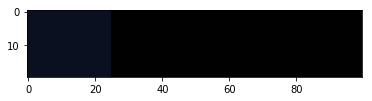

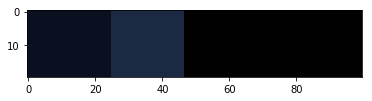

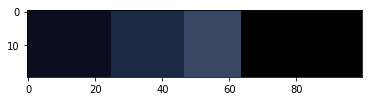

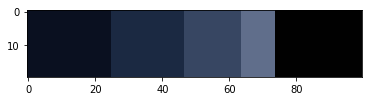

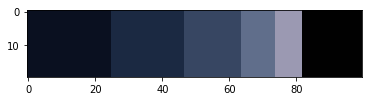

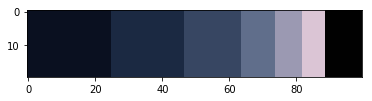

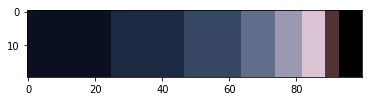

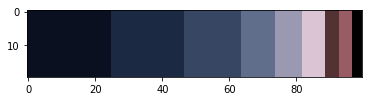

As the loop iterate 8 times and each time it iterate it gives the next dominant color 


In [19]:
print_matrix=np.ones((20,100,3),dtype=np.uint8)
start=0
for ix in range(len(sorted_info)):
    color=sorted_info[ix][0]
    width=int((sorted_info[ix][1])*(print_matrix.shape[1]))
    'width =frquency ratio * 100'
    end=start+width
    print_matrix[:,start:end,:]=color
    start=end
    
    plt.imshow(print_matrix)
    plt.show()
print('''As the loop iterate 8 times and each time it iterate it gives the next dominant color ''')    